# cropping pages

((600, 800, 3), (768, 1024, 3), (768, 1366, 3))

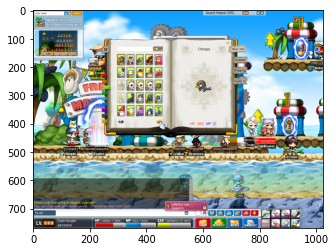

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path

screenshots = sorted(Path("../data/raw/resolutions").glob("*"))
hdclient_0, hdclient_1, hdclient_2 = [mpimg.imread(p, format="jpg") for p in screenshots]
client = [hdclient_0, hdclient_1, hdclient_2]
imgplot = plt.imshow(hdclient_1)

client[0].shape, client[1].shape, client[2].shape

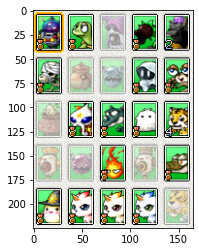

(225, 165, 3)

In [2]:
def imshow(img):
    plt.imshow(img, cmap=plt.get_cmap("gray"))
    plt.show()
    
CROP_SHAPE = (225, 165)

def crop_win(img):
    x, y = 152, 295
    cropped = img[x:x+CROP_SHAPE[0], y:y+CROP_SHAPE[1]]
#     assert cropped.shape[:2] == CROP_RES, cropped.shape
    return cropped

def crop_mac(img):
    x, y = 412, 569
    cropped = img[x:x+CROP_SHAPE[0]*2, y:y+CROP_SHAPE[1]*2]
    assert cropped.shape[:2] == (CROP_SHAPE[0]*2, CROP_SHAPE[1]*2), cropped.shape
    return cropped

def crop(img):
    if img.shape[:2] not in ((600, 800), (768, 1024), (768, 1366)):
        return crop_mac(img)
    else:
        return crop_win(img)

img = crop(client[0])
imshow(img)
img.shape

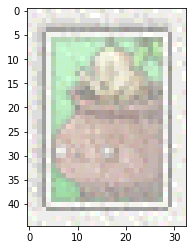

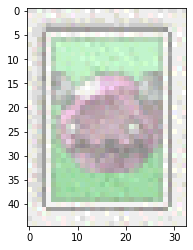

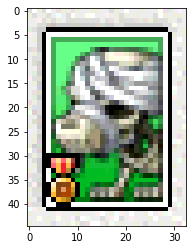

In [3]:
def crop_cards(img):
    num_rows = 5
    num_cols = 5
    cards = []
    h = int(img.shape[0]/num_rows)
    w = int(img.shape[1]/num_cols)
    for i in range(num_rows):
        for j in range(num_cols):
            card = img[i*h:(i+1)*h,j*w:(j+1)*w]
            cards.append(card)
    return cards

cards = crop_cards(img)
        
import random
for card in random.sample(cards, 3):
    imshow(card)

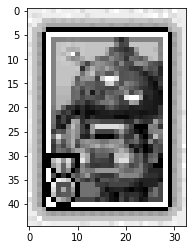

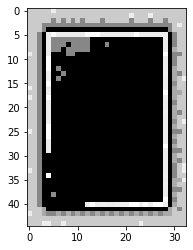

In [4]:
from functools import reduce

# https://stackoverflow.com/a/12201744
def rgb2gray(rgb):
    return (np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])*255).astype(int)

imshow(rgb2gray(cards[0]))
imshow(reduce(np.bitwise_and, map(rgb2gray, cards)))

The cards are aligned correctly since xor'ing all the values retains the card shape.

# cropping tags

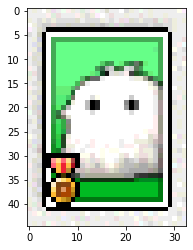

(45, 33, 3)

In [5]:
def crop_card(img, i, j):
    num_rows = 5
    num_cols = 5
    h = int(img.shape[0] / num_rows)
    w = int(img.shape[1] / num_cols)
    return img[i * h : (i + 1) * h, j * w : (j + 1) * w]

def crop_tag(card):
    cropped = card[62:80, 11:23]
    assert cropped.shape[:2] == (18, 12), cropped.shape
    return cropped

card = crop_card(crop(client[0]), 2, 3)
imshow(card)
card.shape

# cropping cards

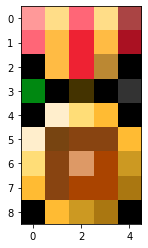

(9, 5, 3)

In [6]:
def crop_tag(card):
    x, y = 31, 5
    shape = 9, 5
    cropped = card[x:x+shape[0], y:y+shape[1]]
    return cropped

tag = crop_tag(card)
imshow(tag)
tag.shape